In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:
!pip install tqdm

In [3]:
Data_Train=pd.read_excel(r"C:\Users\Prashant\Desktop\dataset\Participants\Data_Train.XLSX")
Data_Test = pd.read_excel(r"C:\Users\Prashant\Desktop\dataset\Participants\Data_Test.XLSX")

In [4]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


In [5]:

Data_Train.head(8)


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes


In [6]:
Data_Train.shape

(11094, 9)

In [7]:
Data_Train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [8]:
Data_Train.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [9]:
Data_Train


,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
5,ID_5221,"Rmz Centennial, I Gate, Whitefield","South Indian, North Indian, Chinese",₹150,₹50,3.8,46,18,30 minutes
6,ID_3777,Mumbai Central,"Beverages, Fast Food",₹150,₹50,3.7,108,31,30 minutes
7,ID_745,Delhi University-GTB Nagar,"Chinese, Thai, Asian",₹650,₹50,4.0,1731,1235,45 minutes
8,ID_2970,Delhi University-GTB Nagar,"Mithai, Street Food",₹100,₹50,3.9,110,26,30 minutes
9,ID_3474,"Sector 1, Noida","Fast Food, North Indian, Rolls, Chinese, Momos...",₹200,₹50,3.9,562,294,65 minutes


In [10]:
Data_Train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [11]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
Restaurant       11094 non-null object
Location         11094 non-null object
Cuisines         11094 non-null object
Average_Cost     11094 non-null object
Minimum_Order    11094 non-null object
Rating           11094 non-null object
Votes            11094 non-null object
Reviews          11094 non-null object
Delivery_Time    11094 non-null object
dtypes: object(9)
memory usage: 780.1+ KB


In [40]:
Data_Train['Average_Cost'].unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', '200',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [13]:
Data_Train[Data_Train['Average_Cost'] == 'for']

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
6297,ID_6472,Pune University,Fast Food,for,₹50,NEW,-,-,30 minutes


In [14]:
Data_Train['Average_Cost'].replace('for', '200', inplace = True)

In [15]:
Data_Train['Average_Cost_Cleaned'] = Data_Train['Average_Cost'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [16]:
Data_Train['Average_Cost_Cleaned'].unique()

array([ 200,  100,  150,  250,  650,  350,  800,   50,  400,  600,  300,
        750,  450,  550, 1000,  500,  900, 1200,  950,  850,  700, 1150,
       1100, 1400, 2050], dtype=int64)

In [17]:
Data_Train['Minimum_Order'].unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59'], dtype=object)

In [18]:

Data_Train['Minimum_Order_Cleaned'] = Data_Train['Minimum_Order'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [19]:
Data_Train['Minimum_Order_Cleaned'].unique()

array([ 50,  99,   0, 200, 450, 350,  79, 400, 199, 500, 250, 150,  90,
       299, 300, 240,  89,  59], dtype=int64)

In [20]:
Data_Train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


In [21]:
# fUNCTION HELPS US TO DETERMINE FEATRUES IN A SINGLE CELL
def features_in_row(Data_Test,Data_Train,delimeter):
    max_info=0
    item_lis = list(Data_Train.append(Data_Test))
    for i in item_lis:
        if len(i.split("{}".format(delimeter)))>max_info:
            max_info = len(i.split("{}".format(delimeter)))
        print("\n","-"*35)
        print("Max_features =",max_info)
        return max_info

In [22]:
def feature_splitter(feat, name, delimiter, max_info):
  item_lis = list(feat)
  extracted_features = {}

  for i in range(max_info):
    extracted_features['{}_Feature_{}'.format(name, i+1)] = []
  
  print("-"*35)
  print("Features Dictionary : ", extracted_features)

  for i in tqdm(range(len(item_lis))):
    for j in range(max_info):  
      try:
        extracted_features['{}_Feature_{}'.format(name,j+1)].append(item_lis[i].split("{}".format(delimiter))[j].lower().strip())
      except: 
        extracted_features['{}_Feature_{}'.format(name, j+1)].append(np.nan)


  return extracted_features

In [23]:
loc_max = features_in_row(Data_Test['Location'],Data_Train['Location'], ',')
train_Location_splits = feature_splitter(Data_Train['Location'], 'Location', ',', loc_max)
test_Location_splits = feature_splitter(Data_Test['Location'], 'Location', ',', loc_max)


 -----------------------------------
Max_features = 3
-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': []}


100%|█████████████████████████████████████████████████████████████████████████| 11094/11094 [00:00<00:00, 92908.06it/s]


-----------------------------------
Features Dictionary :  {'Location_Feature_1': [], 'Location_Feature_2': [], 'Location_Feature_3': []}


100%|███████████████████████████████████████████████████████████████████████████| 2774/2774 [00:00<00:00, 99339.16it/s]


In [24]:
cus_max = features_in_row(Data_Test['Cuisines'],Data_Train['Cuisines'], ',')
train_Cuisines_splits = feature_splitter(Data_Train['Cuisines'], 'Cuisines', ',', cus_max)
test_Cuisines_splits = feature_splitter(Data_Test['Cuisines'], 'Cuisines', ',', cus_max)


 -----------------------------------
Max_features = 5
-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': []}


100%|█████████████████████████████████████████████████████████████████████████| 11094/11094 [00:00<00:00, 64678.98it/s]


-----------------------------------
Features Dictionary :  {'Cuisines_Feature_1': [], 'Cuisines_Feature_2': [], 'Cuisines_Feature_3': [], 'Cuisines_Feature_4': [], 'Cuisines_Feature_5': []}


100%|███████████████████████████████████████████████████████████████████████████| 2774/2774 [00:00<00:00, 61766.40it/s]


In [25]:
Data_Train.describe(include='all')

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
count,11094,11094,11094,11094,11094,11094,11094,11094,11094,11094.000000,11094.000000
unique,7480,35,2179,26,18,33,1103,761,7,NaN,NaN
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes,NaN,NaN
freq,22,947,850,3241,10118,1191,2074,2312,7406,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.708671,53.344511
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.833261,18.551245
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.000000,50.000000


In [26]:
def non_numerals(series):
  non_numerals = []
  for i in series.unique():
    try :
      i = float(i)
    except:
      non_numerals.append(i)
  return non_numerals

In [27]:
def replace_nn_with(series, type_, fill_with = None, method = 'mean'):

  nn = non_numerals(series)
  print('-'*30)
  print('-'*30)
  print("Non Numerals in column ",series.name," : ",nn)

  series = series.replace(nn, np.nan, inplace = False)
  nulls = series.isnull().sum()
  if fill_with:
    series.fillna(fill_with, inplace = True)
    print("Filling Non Numerals with {}".format(fill_with))
  
  else:
    series = series.replace(nn, np.nan, inplace = False)

    if method == 'mean' :
      rep = series.astype(float).mean()
      print("Filling Non Numerals with MEAN = ", rep)

    elif method == 'median' :
      rep = series.astype(float).median()
      print("Filling Non Numerals with MEDIAN = ", rep)

    elif method == 'min' :
      rep = series.astype(float).min()
      print("Filling Non Numerals with MINIMUM = ", rep)

    else:
      print('Please pass a valid method as a string -- ("mean" or "median" or "min")')
      return 0

    series.fillna(rep, inplace = True)
    
  try:
    series = series.astype(type_)
    print(nulls, ": observations replaced")
    return series
  except:
    # Since type conversion of a string containting decimals to int is not possible, it is first converted to float
    series =  series.astype(float)
    print(nulls, ": observations replaced")
    series =  series.astype(type_)
    return series

In [28]:
Data_Train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99


In [29]:
Data_Train['Rating_Cleaned'] = replace_nn_with(Data_Train['Rating'],float, method = 'mean')

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['-', 'NEW', 'Opening Soon', 'Temporarily Closed']
Filling Non Numerals with MEAN =  3.6134596429744668
1963 : observations replaced


In [30]:
Data_Test['Rating_Cleaned'] = replace_nn_with(Data_Test['Rating'],float, fill_with = 3.6134596429744668)

------------------------------
------------------------------
Non Numerals in column  Rating  :  ['NEW', '-', 'Opening Soon']
Filling Non Numerals with 3.6134596429744668
507 : observations replaced


In [31]:
Data_Train['Votes_Cleaned'] = replace_nn_with(Data_Train['Votes'],int,method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with MEAN =  244.54445676274943
2074 : observations replaced


In [32]:
Data_Test['Votes_Cleaned'] = replace_nn_with(Data_Test['Votes'],int,fill_with = 244.54445676274943)

------------------------------
------------------------------
Non Numerals in column  Votes  :  ['-']
Filling Non Numerals with 244.54445676274943
542 : observations replaced


In [33]:
Data_Train['Reviews_Cleaned'] = replace_nn_with(Data_Train['Reviews'],int, method =  'mean')

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with MEAN =  123.24789341835573
2312 : observations replaced


In [34]:
Data_Test['Reviews_Cleaned'] = replace_nn_with(Data_Test['Reviews'],int, method =  'mean',fill_with = 123.247893 )

------------------------------
------------------------------
Non Numerals in column  Reviews  :  ['-']
Filling Non Numerals with 123.247893
593 : observations replaced


In [35]:
Data_Train.head(5)

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Average_Cost_Cleaned,Minimum_Order_Cleaned,Rating_Cleaned,Votes_Cleaned,Reviews_Cleaned
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,200,50,3.5,12,4
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,100,50,3.5,11,4
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,150,50,3.6,99,30
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,250,99,3.7,176,95
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,200,99,3.2,521,235


In [45]:
Data_Train.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time', 'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned'],
      dtype='object')

In [37]:
cols = ['Restaurant',  'Average_Cost_Cleaned',
       'Minimum_Order_Cleaned', 'Rating_Cleaned', 'Votes_Cleaned',
       'Reviews_Cleaned','Delivery_Time' ]

In [47]:
train_sample = Data_Train[cols]

In [49]:

train_sample = pd.concat([pd.DataFrame(train_Location_splits), pd.DataFrame(train_Cuisines_splits),train_sample],sort=False,axis = 1)
#test_sample = pd.concat([pd.DataFrame(test_Location_splits), pd.DataFrame(test_Cuisines_splits), test_sample],sort=False,axis = 1)

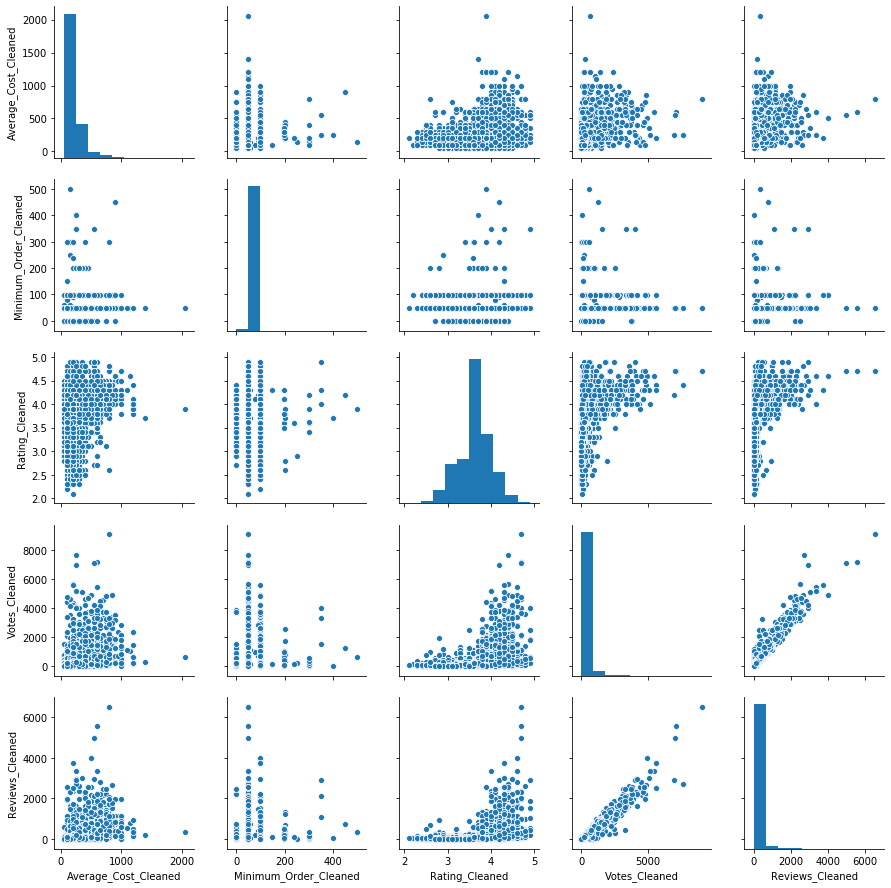

In [50]:
import seaborn
seaborn.pairplot(train_sample)

In [51]:
train_sample.isnull().sum()

Location_Feature_1           0
Location_Feature_2        1942
Location_Feature_3        6364
Cuisines_Feature_1           0
Cuisines_Feature_2        3012
Cuisines_Feature_3        6931
Cuisines_Feature_4        9393
Cuisines_Feature_5       10449
Location_Feature_1           0
Location_Feature_2        1942
Location_Feature_3        6364
Cuisines_Feature_1           0
Cuisines_Feature_2        3012
Cuisines_Feature_3        6931
Cuisines_Feature_4        9393
Cuisines_Feature_5       10449
Restaurant                   0
Average_Cost_Cleaned         0
Minimum_Order_Cleaned        0
Rating_Cleaned               0
Votes_Cleaned                0
Reviews_Cleaned              0
Delivery_Time                0
dtype: int64

In [52]:
train_sample.fillna('NAN', inplace = True)

In [53]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [54]:
train_sample.isnull().sum()

Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Location_Feature_1       0
Location_Feature_2       0
Location_Feature_3       0
Cuisines_Feature_1       0
Cuisines_Feature_2       0
Cuisines_Feature_3       0
Cuisines_Feature_4       0
Cuisines_Feature_5       0
Restaurant               0
Average_Cost_Cleaned     0
Minimum_Order_Cleaned    0
Rating_Cleaned           0
Votes_Cleaned            0
Reviews_Cleaned          0
Delivery_Time            0
dtype: int64

In [55]:


temp1 = []
for i in train_Cuisines_splits.keys():
  for j in train_Cuisines_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Cuisines_splits.keys():
  for j in test_Cuisines_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_cuisines = list(pd.Series(temp1).unique())
unique_cuisines.append('NAN')



In [56]:
len(unique_cuisines)

102

In [57]:


temp1 = []
for i in train_Location_splits.keys():
  for j in train_Location_splits.get(i):
    temp1.append(j)

temp2 = []
for i in test_Location_splits.keys():
  for j in test_Location_splits.get(i):
    temp2.append(j)

temp1.extend(temp2)

unique_locations = list(pd.Series(temp1).unique())
unique_locations.append('NAN')



In [58]:
len(unique_locations)

66

In [66]:
from sklearn.preprocessing import LabelEncoder
le_c = LabelEncoder().fit(unique_cuisines)
le_l = LabelEncoder().fit(unique_locations)